## InterQ Final Review Meeting - CiP Learning Factory Quality Hallmarks

This notebook exemplarily shows the adapter python module that has been developed to use the learning factory data sources in the InterQ Trusted Framework (TF)

In [38]:
%load_ext autoreload
%autoreload 2

import json
from interq_cip_qhs.process.milling import MillingProcessData
from interq_cip_qhs.product.milling import MillingProductData
from interq_cip_qhs.config import Config
config = Config()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Process Quality Hallmark Generation from Raw Data

#### Normal Part Example

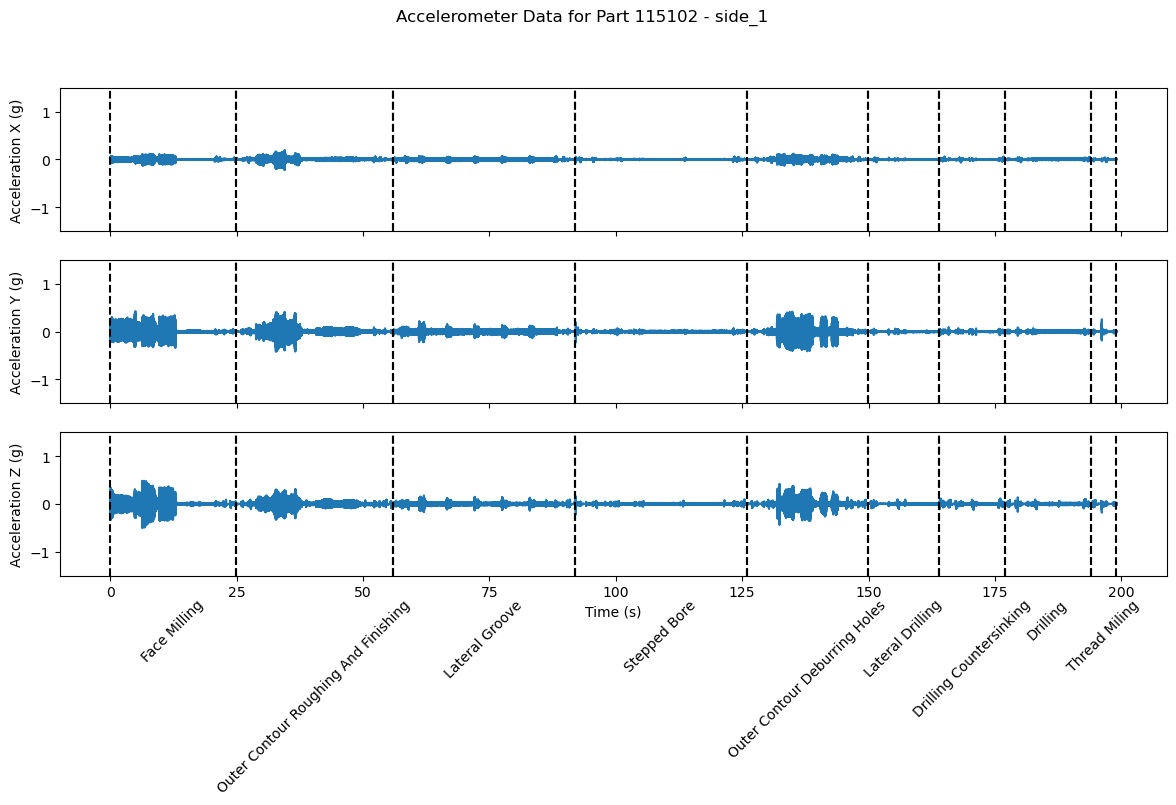

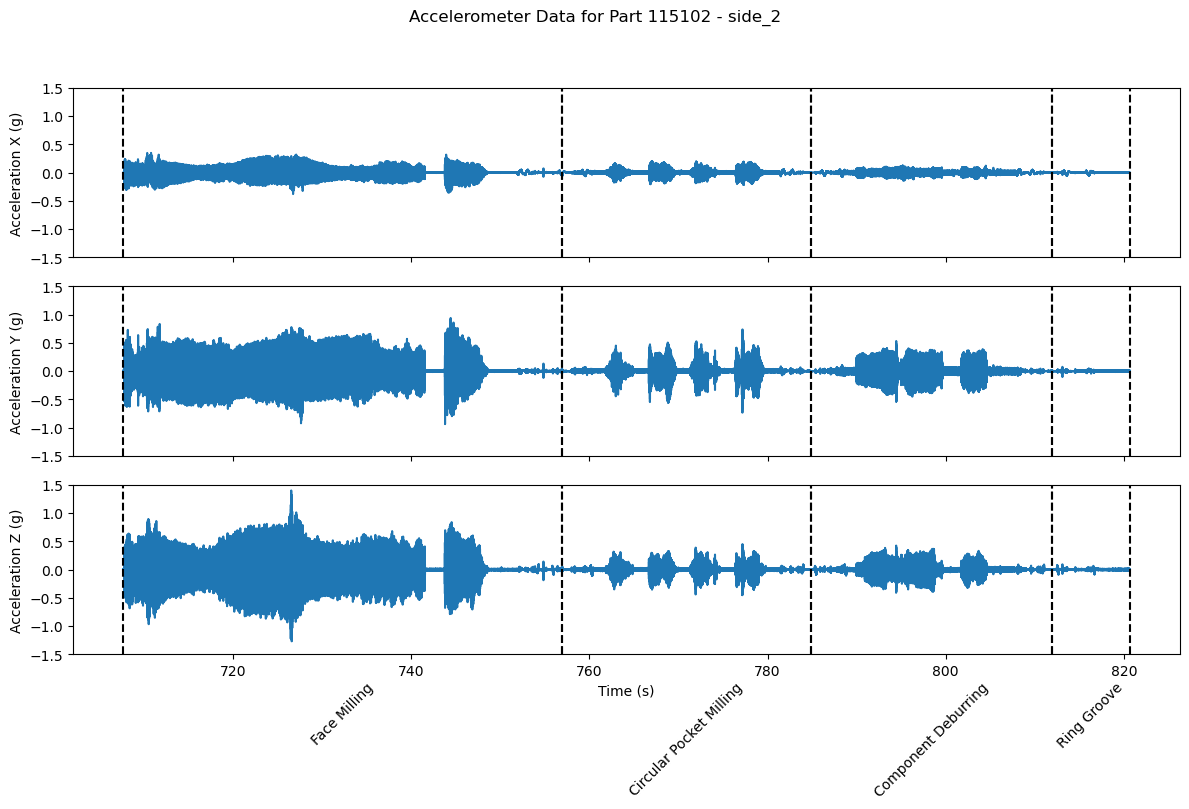

In [2]:
reader = MillingProcessData()
reader.plot_raw_acc_data(id="115102")

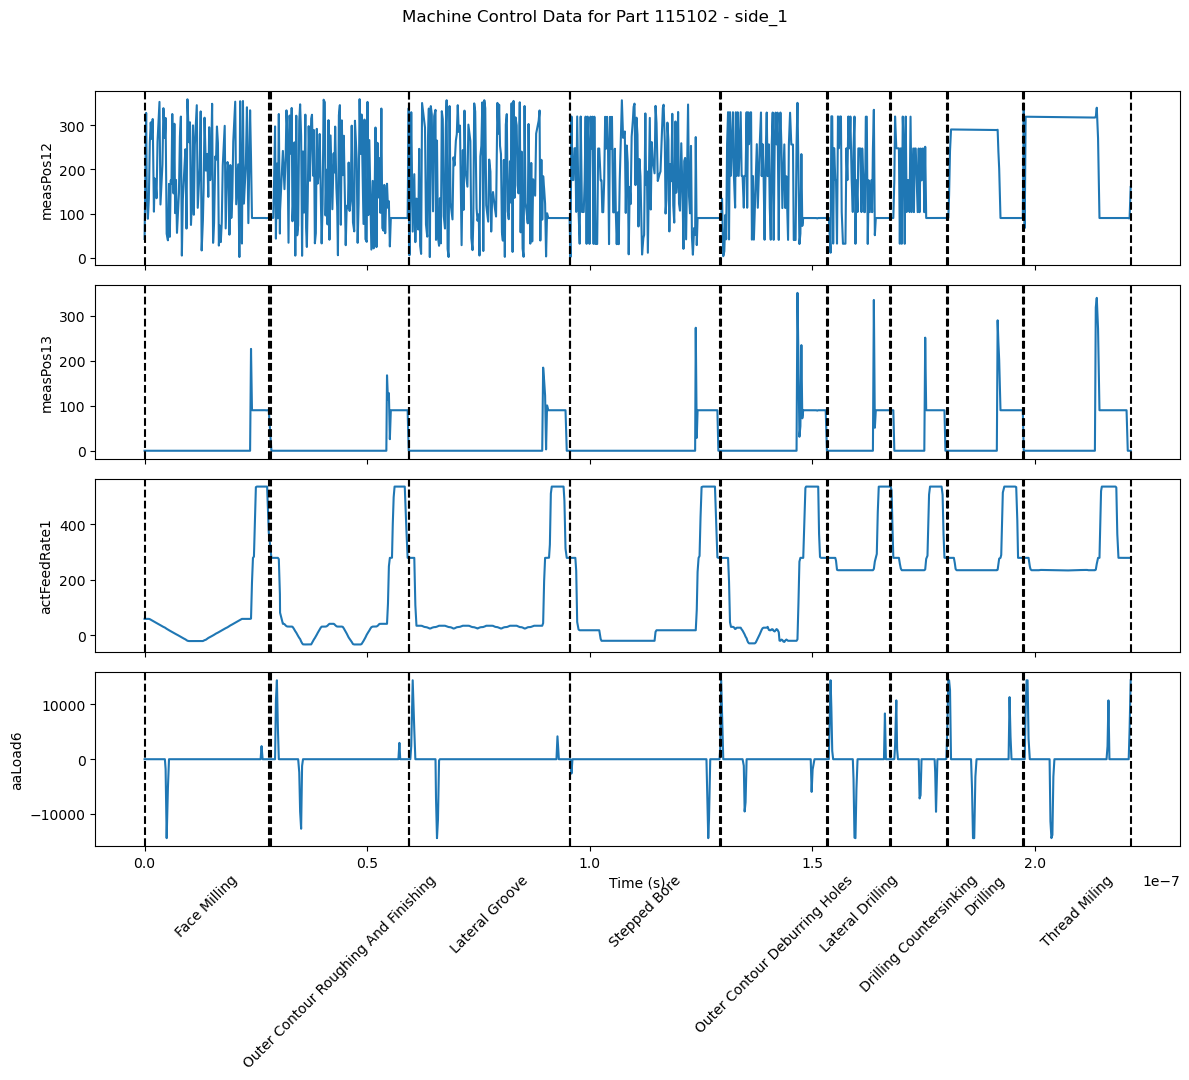

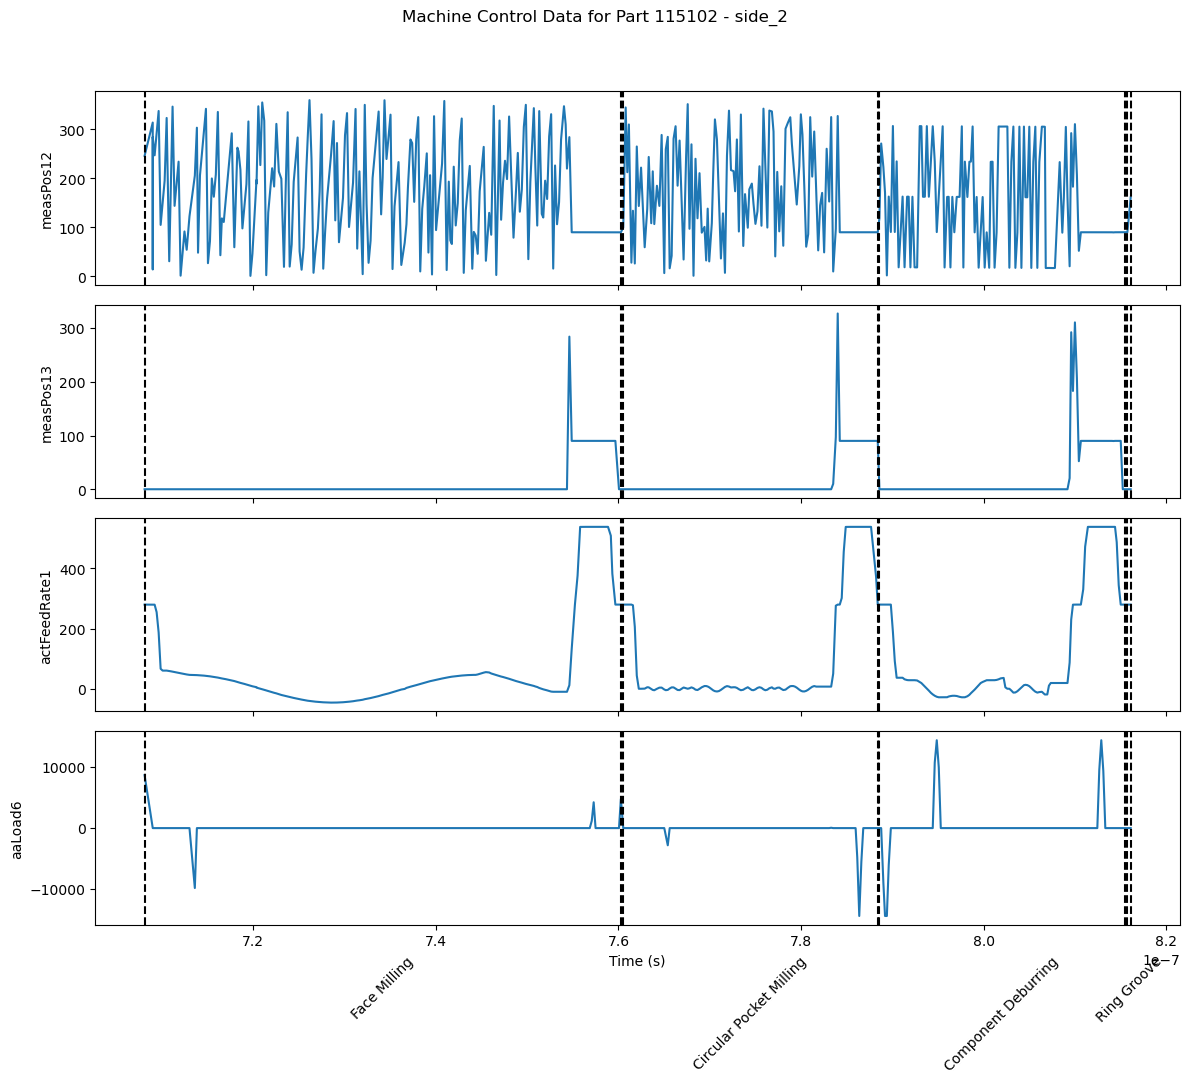

In [3]:
reader.plot_raw_bfc_data(id="115102")

#### Anomalous Part Example

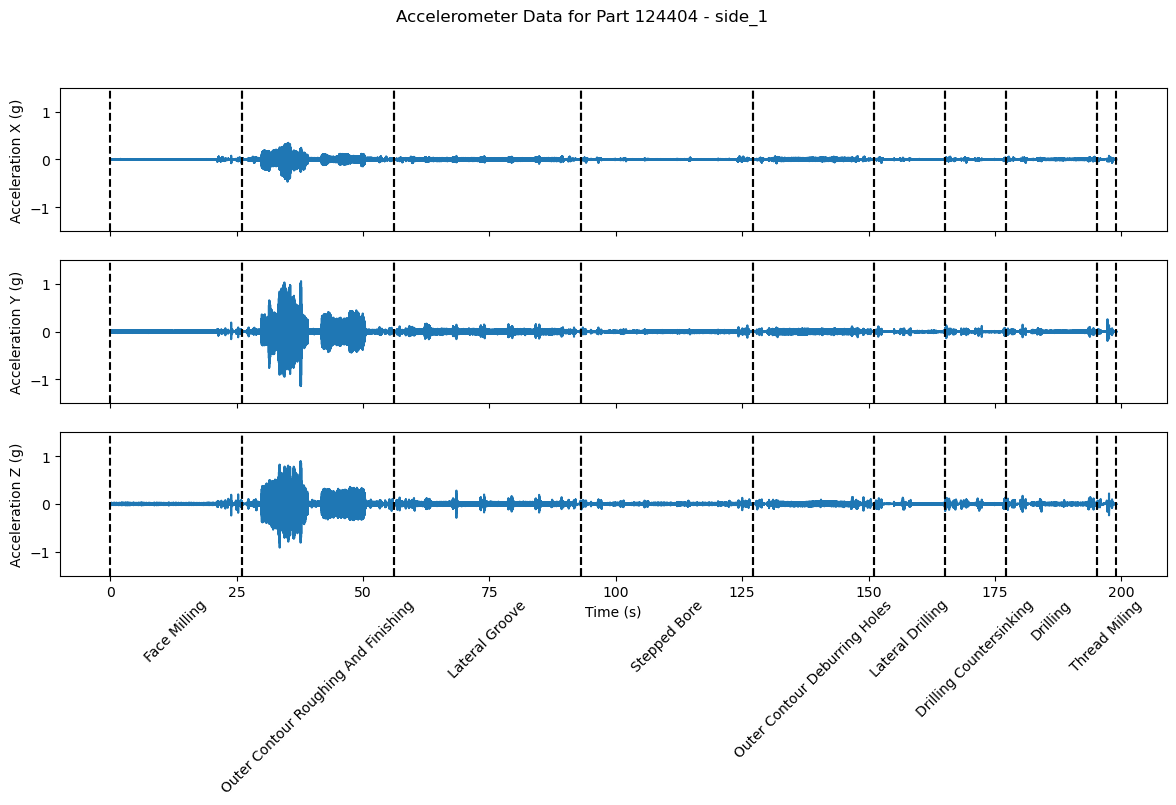

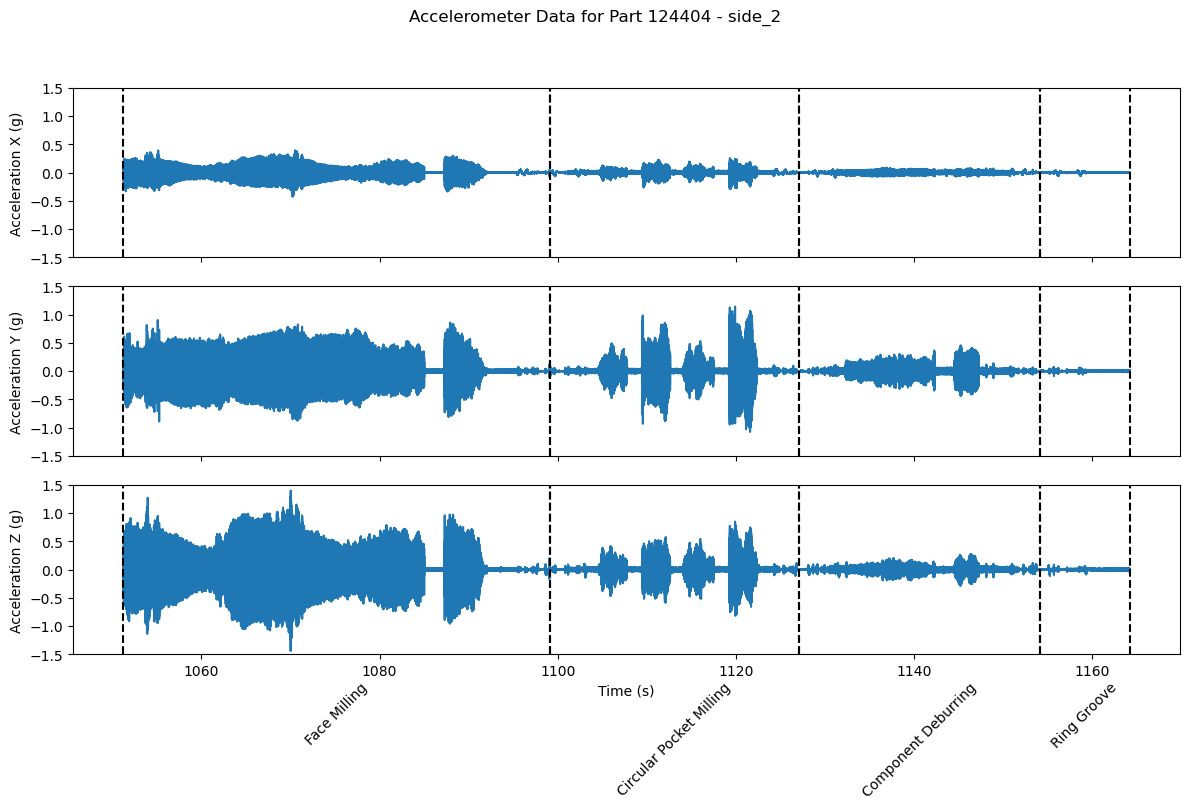

In [4]:
reader.plot_raw_acc_data(id="124404")

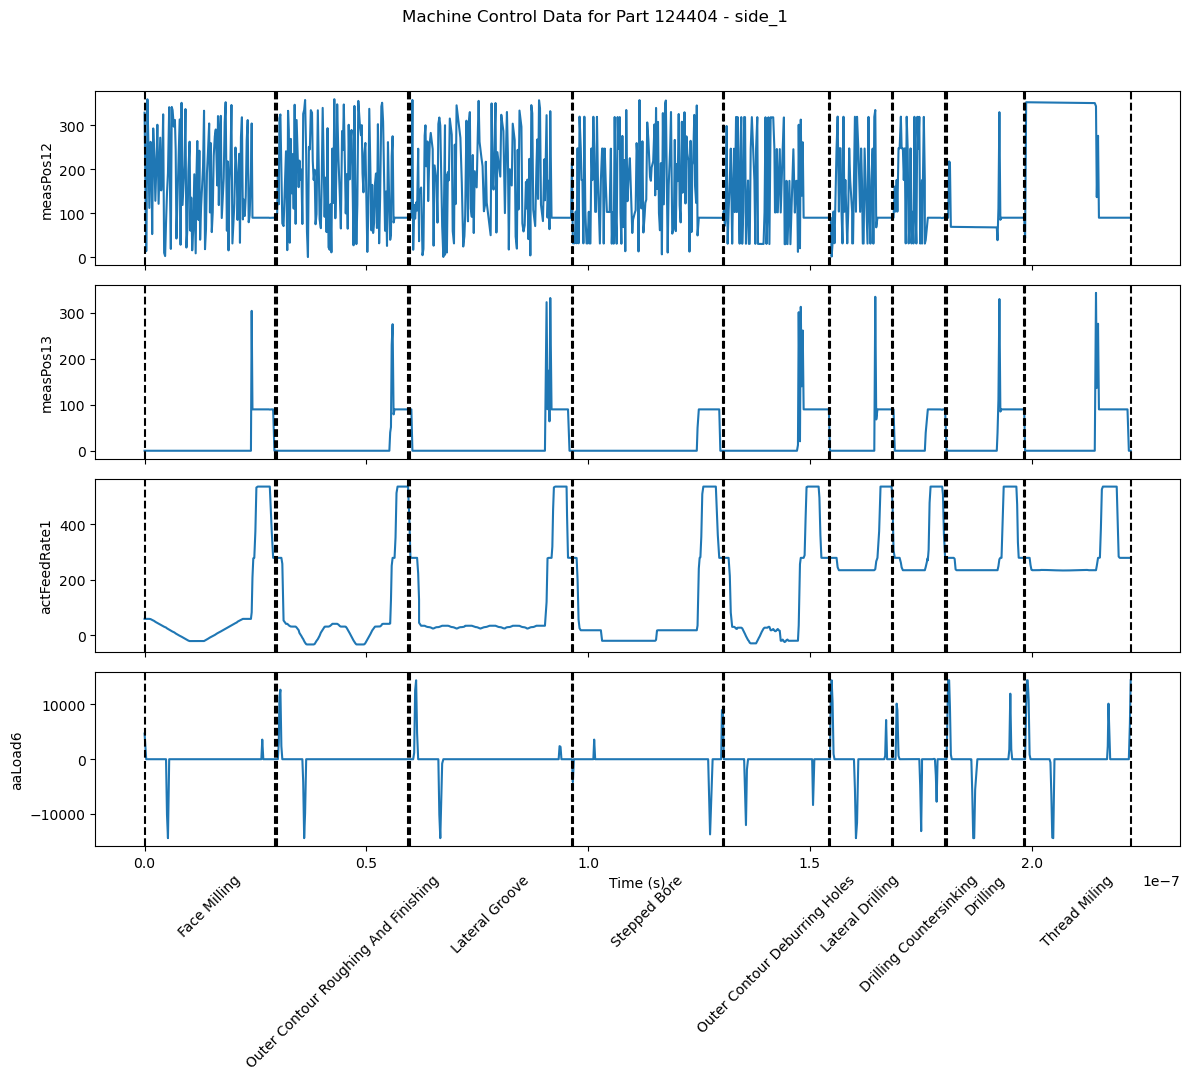

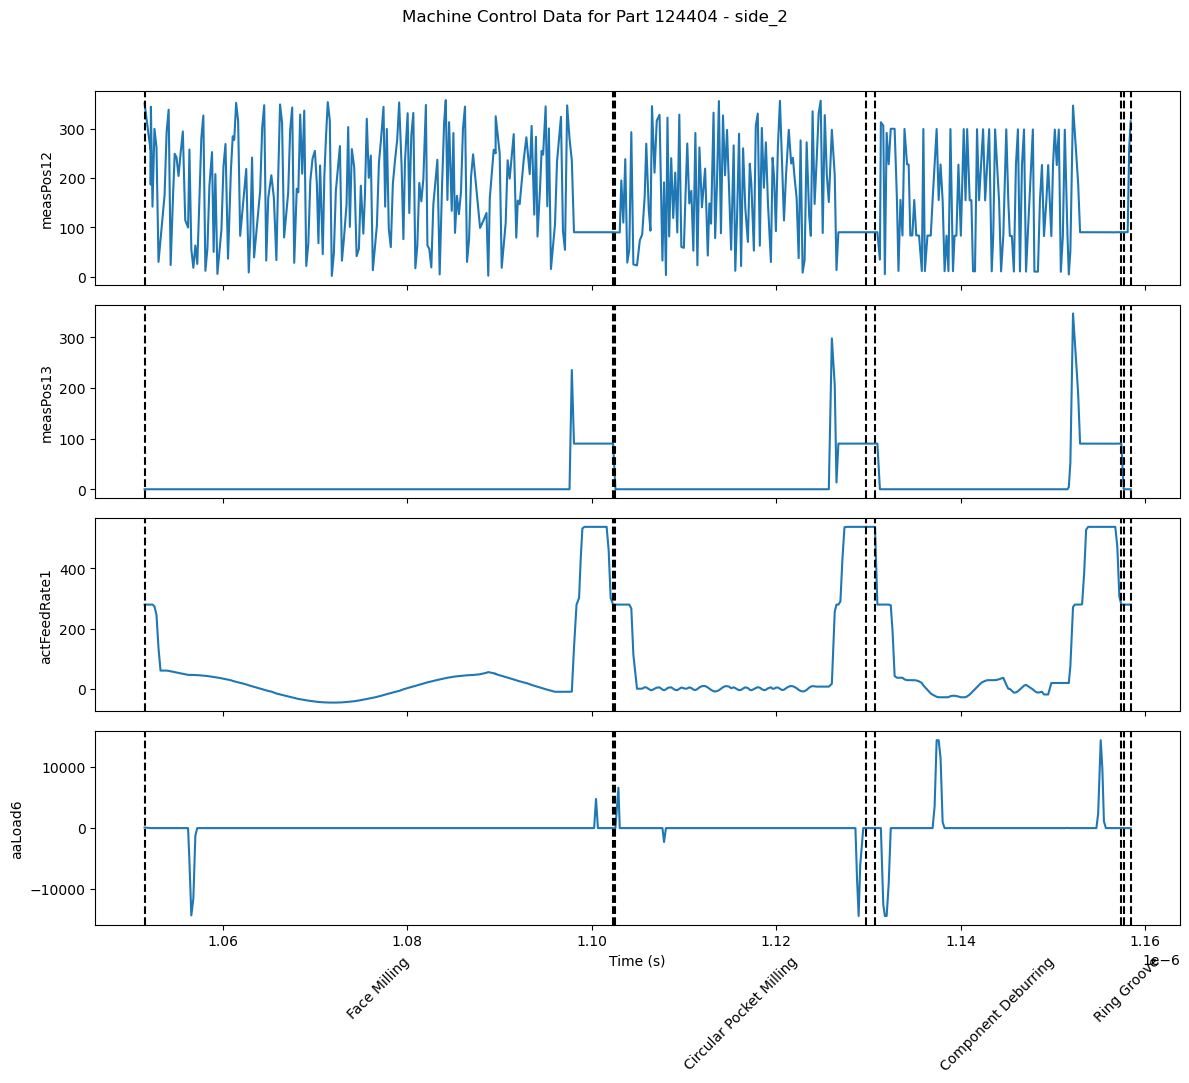

In [5]:
reader.plot_raw_bfc_data(id="124404")

#### Process Quality Hallmark Generation

In [8]:
process_qhd = reader.get_process_QH_id(id="124404")

Feature Extraction: 100%|██████████| 20/20 [00:01<00:00, 12.63it/s]


In [39]:
with open("sample_json.json", "w") as outfile:
    json.dump(process_qhd, outfile)

In [15]:
process_qhd["qhd"]["qhd-header"]

{'owner': 'ptw',
 'subject': 'part::cylinder_bottom,part_id::115102,process::milling,type::process_qh',
 'timeref': '2023-01-06T09:43:02+01:00',
 'model': 'demo_process_milling_data_11',
 'asset': 'type::process_qh'}

In [19]:
list(process_qhd["qhd"]["qhd-body"].keys())

['side_1_outer_contour_roughing_and_finishing',
 'side_1_drilling',
 'side_1_lateral_drilling',
 'side_1_drilling_countersinking',
 'side_1_outer_contour_deburring_holes',
 'side_1_thread_miling',
 'side_1_lateral_groove',
 'side_1_face_milling',
 'side_1_stepped_bore',
 'side_2_face_milling',
 'side_2_circular_pocket_milling',
 'side_2_component_deburring',
 'side_2_ring_groove']

In [23]:
process_qhd["qhd"]["qhd-body"]["side_1_face_milling"]

{'features_acc': {'IND_acc_x__sum_values': -14.729225775636982,
  'IND_acc_x__median': -6.7548126e-05,
  'IND_acc_x__mean': -0.0002367585960206549,
  'IND_acc_x__length': 62212.0,
  'IND_acc_x__standard_deviation': 0.02466012211014193,
  'IND_acc_x__variance': 0.0006081216224871109,
  'IND_acc_x__root_mean_square': 0.02466125862805669,
  'IND_acc_x__maximum': 0.11723430707700001,
  'IND_acc_x__absolute_maximum': 0.135122330138,
  'IND_acc_x__minimum': -0.135122330138,
  'IND_acc_y__sum_values': 30.022321517290052,
  'IND_acc_y__median': 0.00041250876,
  'IND_acc_y__mean': 0.00048258087695766174,
  'IND_acc_y__length': 62212.0,
  'IND_acc_y__standard_deviation': 0.06738227038423422,
  'IND_acc_y__variance': 0.004540370362134049,
  'IND_acc_y__root_mean_square': 0.0673839984450081,
  'IND_acc_y__maximum': 0.43033135112999993,
  'IND_acc_y__absolute_maximum': 0.43033135112999993,
  'IND_acc_y__minimum': -0.3339067649,
  'IND_acc_z__sum_values': 40.096972432555035,
  'IND_acc_z__median': 0

In [30]:
s1_fm_x_sd_1 = process_qhd["qhd"]["qhd-body"]["side_1_face_milling"]["features_acc"][
    "IND_acc_x__standard_deviation"
]

process_qhd_2 = reader.get_process_QH_id(id="124404")
s1_fm_x_sd_2 = process_qhd_2["qhd"]["qhd-body"]["side_1_face_milling"]["features_acc"][
    "IND_acc_x__standard_deviation"
]

print(
    "\nFace milling x standard deviation:\nID 115102: {:.4f} \nID 124404: {:.4f}".format(
        s1_fm_x_sd_1, s1_fm_x_sd_2
    )
)

Feature Extraction: 100%|██████████| 20/20 [00:01<00:00, 13.53it/s]


Face milling x standard deviation:
ID 115102: 0.0247 
ID 124404: 0.0082


### Data Quality Hallmark Generation from Raw Data using DNV DQaaS Docker

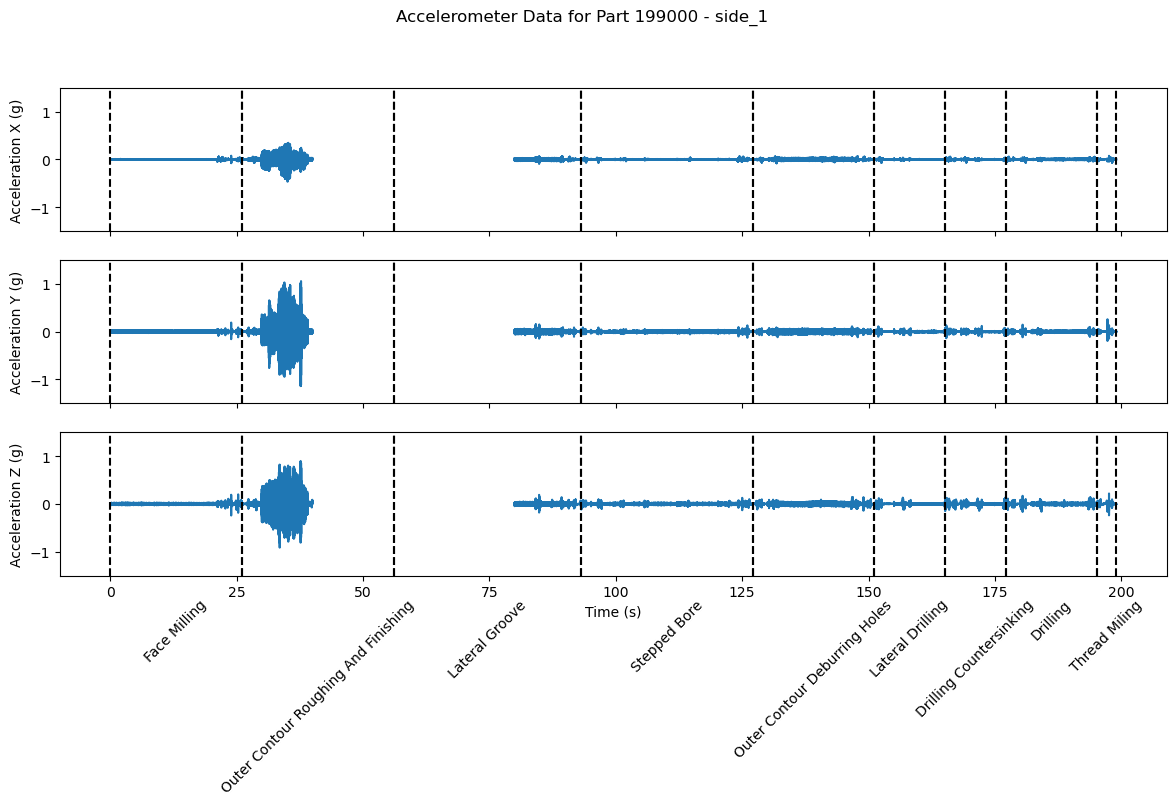

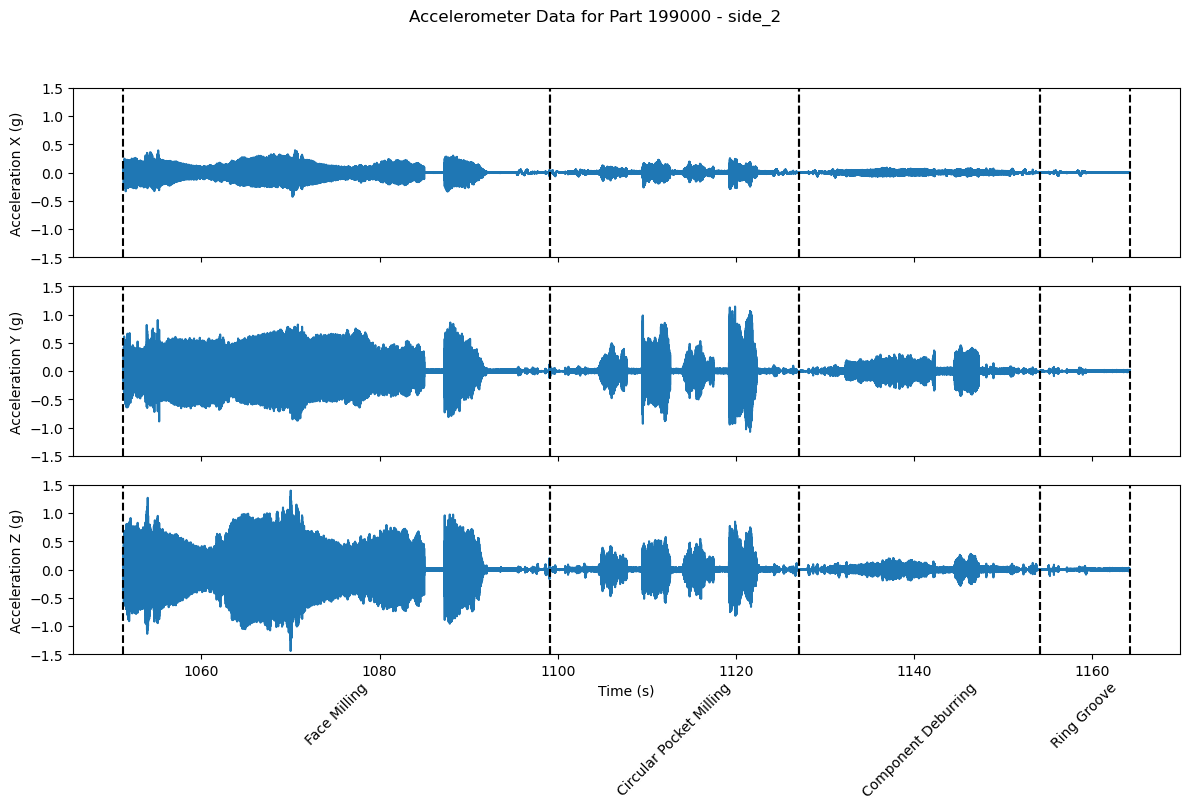

In [77]:
reader = MillingProcessData()
reader.plot_raw_acc_data(id="199000")

In [89]:
reader = MillingProcessData()
reader.get_data_QH_id("199000", container_name="hungry_elbakyan")

Feature Extraction: 100%|██████████| 20/20 [00:01<00:00, 13.80it/s]


{'qhd': {'qhd-header': {'timeref': '2022-12-14T15:39:48+01:00',
   'owner': 'InterQ',
   'asset': 'type::data_qh',
   'model': 'demo_process_milling_data_11',
   'subject': 'part::cylinder_bottom,part_id::199000,process::milling,type::data_qh'},
  'qhd-body': {'key': {},
   'exceptions': {'exception_info': {'exception_traceback': None,
     'exception_message': None,
     'IND_raised_exception': False},
    'result': {'IND_element_count': 780000,
     'IND_unexpected_count': 100000,
     'IND_unexpected_percent': 12.82051282051282,
     'IND_unexpected_percent_total': 12.82051282051282,
     'IND_partial_unexpected_list': []},
    'meta': {},
    'expectation_config': {'meta': {},
     'kwargs': {'IND_column': 'acc_x', 'IND_result_format': 'BASIC'},
     'IND_expectation_type': 'expect_column_values_to_not_be_null'},
    'IND_success': False},
   'IND_program_name': 'DQaaS',
   'IND_start_time': '2022-12-14T14:20:23Z',
   'IND_end_time': '2022-12-14T14:39:48Z',
   'IND_rule_id': 'a97se

In [90]:
reader = MillingProcessData()
reader.get_data_QH_id("124404", container_name="hungry_elbakyan")

Feature Extraction: 100%|██████████| 20/20 [00:01<00:00, 14.62it/s]


{'qhd': {'qhd-header': {'timeref': '2022-12-14T15:39:48+01:00',
   'owner': 'InterQ',
   'asset': 'type::data_qh',
   'model': 'demo_process_milling_data_11',
   'subject': 'part::cylinder_bottom,part_id::124404,process::milling,type::data_qh'},
  'qhd-body': {'key': {},
   'exceptions': {'exception_info': {'exception_traceback': None,
     'exception_message': None,
     'IND_raised_exception': False},
    'result': {'IND_element_count': 780000,
     'IND_unexpected_count': 0,
     'IND_unexpected_percent': 0.0,
     'IND_unexpected_percent_total': 0.0,
     'IND_partial_unexpected_list': []},
    'meta': {},
    'expectation_config': {'meta': {},
     'kwargs': {'IND_column': 'acc_x', 'IND_result_format': 'BASIC'},
     'IND_expectation_type': 'expect_column_values_to_not_be_null'},
    'IND_success': True},
   'IND_program_name': 'DQaaS',
   'IND_start_time': '2022-12-14T14:20:23Z',
   'IND_end_time': '2022-12-14T14:39:48Z',
   'IND_rule_id': 'a97sef79',
   'IND_batch_id': 'aisudfgq

### Product Quality Hallmark Generation from QDAS Software Export

In [70]:
# Initialize the reader with the export of the QDAS software
reader = MillingProductData(
    path_csv="/Users/nicolasjourdan/projects/temp/interq_cip_qhs/src/interq_cip_qhs/notebooks/example_data/cylinder_bottom/cnc_milling_machine/quality_data/quality_data_cylinder_bottom.csv"
)

In [71]:
reader.get_product_QH_id(id="115102")

{'pwd': 'interq',
 'cid': '2WwhkHtuCLBXdnv3M9BN5jGE2wToKuiQmZ6YRwH8BeKb',
 'qhd': {'qhd-header': {'owner': 'ptw',
   'subject': 'part::cylinder_bottom,part_id::115102,process::milling,type::product_qh',
   'timeref': '2022-12-16T12:42:37+01:00',
   'model': 'demo_process_milling_data_11',
   'asset': 'type::product_qh'},
  'qhd-body': {'IND_measurement_time': '16.12.2022 12:42:37',
   'IND_surface_roughness': '2.066',
   'IND_parallelism': '0.031',
   'IND_groove_depth': '0.798',
   'IND_groove_diameter': '-0.0245'}}}

In [72]:
reader.get_product_QH_id(id="124404")

{'pwd': 'interq',
 'cid': '2WwhkHtuCLBXdnv3M9BN5jGE2wToKuiQmZ6YRwH8BeKb',
 'qhd': {'qhd-header': {'owner': 'ptw',
   'subject': 'part::cylinder_bottom,part_id::124404,process::milling,type::product_qh',
   'timeref': '2022-12-15T14:16:06+01:00',
   'model': 'demo_process_milling_data_11',
   'asset': 'type::product_qh'},
  'qhd-body': {'IND_measurement_time': '15.12.2022 14:16:06',
   'IND_surface_roughness': '3.378',
   'IND_parallelism': '0.0485',
   'IND_groove_depth': '0.779',
   'IND_groove_diameter': '-0.0305'}}}